In [41]:
import sys
sys.path.append('../.')
from utils import *
from vqls import *

# set True to reproduce the experiments
reproduce = True
# Choose the function
flab = 'sigmoid'


In [52]:
# Variable setting

n_step = 20 

func_dict, func_out, lower, upper = get_func('vqs')


step = (upper-lower)/n_step
f_i = func_dict[flab]
func = func_out[flab]

# target function
x = np.arange(lower, upper + .03, step).tolist()
y = [func(value,f_i) for value in x]
seeds = []
M = []
Y = []

q_weights=[]
c_coeff=[]
k_list=[]
tr_costs =[]
for i in range(1, len(x)):
    eq1 = pd.Series([1, x[i - 1]])
    eq2 = pd.Series([1, x[i]])
    M_c = pd.concat([eq1, eq2], axis=1).transpose()
    Y.append([y[i - 1], y[i]])
    M.append(M_c)


In [51]:
# To reproduce the results shown in the paper
settings =  {'sigmoid':{ 'starting_points':[np.random.randint(0, 1000)*0.000001 for _ in range(20)],
                        'seeds': [np.random.randint(0, 10000) for _ in range(20)]},
            'sin':{ 'starting_points': [None]*20,
                                    'seeds': []},
            'elu':{ 'starting_points': [None]*20,
                                    'seeds': []},
            'relu':{ 'starting_points': [None]*20,
                                    'seeds': []},
            'none':{ 'starting_points': [None]*20,
                                    'seeds': [None]*20}}

if reproduce:
    params = settings[flab]
else:
    params = settings['none']


In [53]:
params['seeds']

[1795,
 3887,
 161,
 694,
 5335,
 7020,
 4029,
 8615,
 2318,
 2204,
 6687,
 8530,
 1223,
 8410,
 1773,
 9797,
 8999,
 8909,
 9411,
 2282]

## Training V($\theta$)


In [54]:
for i in range(len(M)):
        matrix = M[i]
        vector = Y[i]
        if vector == [0.0, 0.0]:
            vector = [.000001, 0.00001] 
        v_norm = vector/np.linalg.norm(vector)
        vqls_circuit = VQLS(matrix,v_norm,1, seed =params['seeds'][i]) 
        weights = vqls_circuit.train(max_iter=300, warm_start=params['starting_points'][i]) 
        q_weights.append(weights)
        seeds.append(vqls_circuit.rng_seed)
        tr_costs.append(vqls_circuit.cost_vals)
        k_numb=np.linalg.cond(np.array(matrix))
        k_list.append(k_numb)
        


In [55]:
result = {}
result['rmse'] = 0
result['exe_time'] = 0
result['RSS_q']= 0
result['weights'] = q_weights
result["training_cost"] = tr_costs
result['seed'] = seeds


In [66]:
path = '../results/results_vqs_sigmoid_1_20.json'
df = pd.read_json(path)


In [67]:
df

,exe_time,rmse,RSS_q,weights,training_cost,seed
0,209.352936,0.649771,16.888120,"[[6.1040247599], [6.1628042761], [6.2523020215...","[[0.0581745642, 0.0494767652, 0.0437978101, 0....","[3898, 8444, 4250, 8725, 9292, 3445, 6720, 351..."
1,277.820093,0.623319,15.541053,"[[6.0766399857], [6.1683703361], [6.273578108]...","[[0.050649260800000005, 0.04478663, 0.03867787...","[7636, 6204, 1261, 8293, 741, 8718, 3396, 4777..."
2,261.791273,0.713175,20.344738,"[[6.0841122226], [6.1664152029], [-0.021024259...","[[0.0467229251, 0.0410577922, 0.032507038, 0.0...","[2690, 6608, 4870, 8115, 9152, 1480, 2168, 648..."
3,283.129863,0.996948,39.756190,"[[6.1014540424], [6.1734723061], [6.2621632884...","[[0.0500953051, 0.0443309172, 0.0380491662, 0....","[1539, 5394, 8398, 1167, 9019, 4638, 3281, 677..."
4,272.345407,0.807620,26.090024,"[[6.1062757567], [6.1944695718], [6.2562016069...","[[0.0515724387, 0.0455040533, 0.0396116249, 0....","[4987, 2447, 3437, 1412, 7873, 6964, 9504, 886..."
...,...,...,...,...,...,...
196,159.300689,0.584663,13.673230,"[[6.1061689648], [6.1710681017], [6.2746149007...","[[0.24385410870000002, 0.0684714809, 0.0532849...","[4070, 8233, 2439, 5115, 6218, 4173, 5018, 154..."
197,157.422546,1.073200,46.070334,"[[6.1086270138], [6.1843713591], [6.2542919471...","[[0.060851869100000004, 0.0506740621, 0.044806...","[6286, 6537, 2819, 697, 4715, 5387, 1399, 9361..."
198,159.742976,0.533583,11.388432,"[[6.1058162431], [6.1869782746], [6.2716533444...","[[0.060642648900000005, 0.050586899000000005, ...","[8610, 2800, 6856, 2798, 9694, 8648, 8179, 480..."
199,165.725217,0.850834,28.956736,"[[6.1084137184], [6.1651040643], [6.2603768042...","[[0.0726461382, 0.0543678826, 0.04740268740000...","[5649, 5419, 5921, 1868, 6951, 4691, 9541, 705..."


## Quantum inner product

In [60]:
x = np.arange(lower, upper, step).tolist()
qprod = qProduct(1)
y_q = []
for j in range(len(x)):
    point = [1,x[j]]
    y_q.append(qprod.direct_prod2(q_weights[j],point).item())  


## Visualize

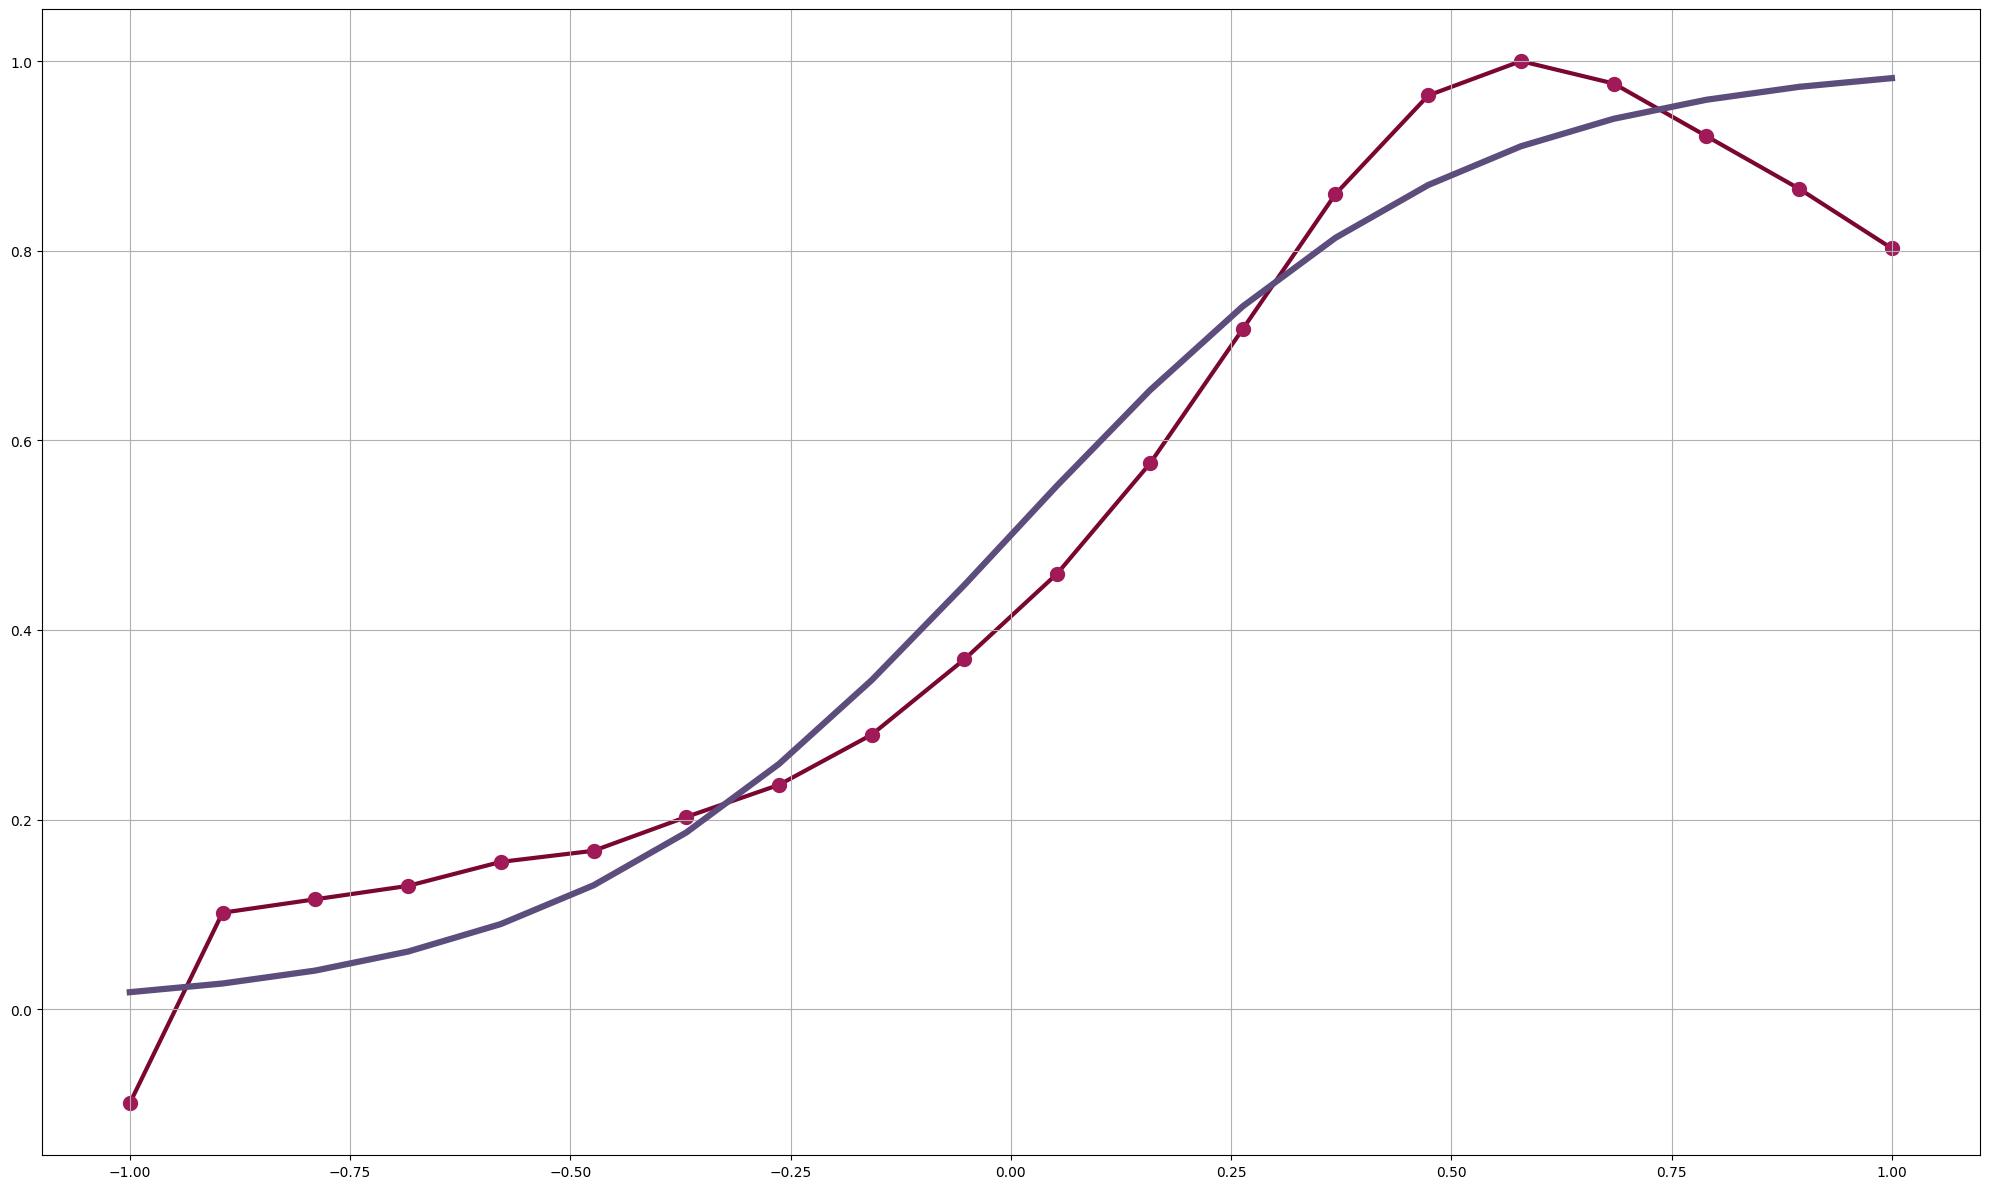

In [63]:
x = np.linspace(lower, upper, n_step) ##inputs sampling in the interval 0,1
y = [func(value,f_i) for value in x]


fig = plt.figure(tight_layout = False, figsize=(20,12))
plt.grid(zorder = -3)
plt.plot(x,y,  label=f"Original function scaled {n_step}", color = '#5c4d7d',linewidth=4.5)

colorl = '#7a0632'
colors = '#a01a58'

plt.plot(x,y_q, color=colorl, zorder= -1, lw=3)
plt.scatter(x,y_q, color=colors, linewidths=5)
